In [25]:
import pathlib
import sys
import os

def get_working_dir():
    """Get the directory of the root of the repository.

    Returns
    -------
    str
        The absolute path to the repository root.
    """
    project_path = pathlib.Path('.').resolve()
    while not (project_path / '.git').exists():
        parent = project_path.parent
        
        if parent == project_path:
            raise RuntimeError('Could not find git root directory')
        
        project_path = parent
    
    return str(project_path)

    
def set_working_dir(project_path):
    sys.path.append(project_path)
    os.chdir(project_path)
    
set_working_dir(get_working_dir())

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from ipywidgets import interact, widgets, Layout
from a2021.a09.a10_read_3d_files.code.data import all_colormaps
from a2021.a11.a17_plot_lum_0_01.code.data import data_info, ALL_DATA

from a2021.a11.a17_plot_lum_0_01.code.load_data import (
    variable_names,
    CUSTOM_VARIABLES
)

from a2021.a12.a30_hires2d_movie.code.plot import (
    set_plot_style,
    make_plot_for_real
)

# Make images non-blurry on high pixel density screens
%config InlineBackend.figure_format = 'svg'

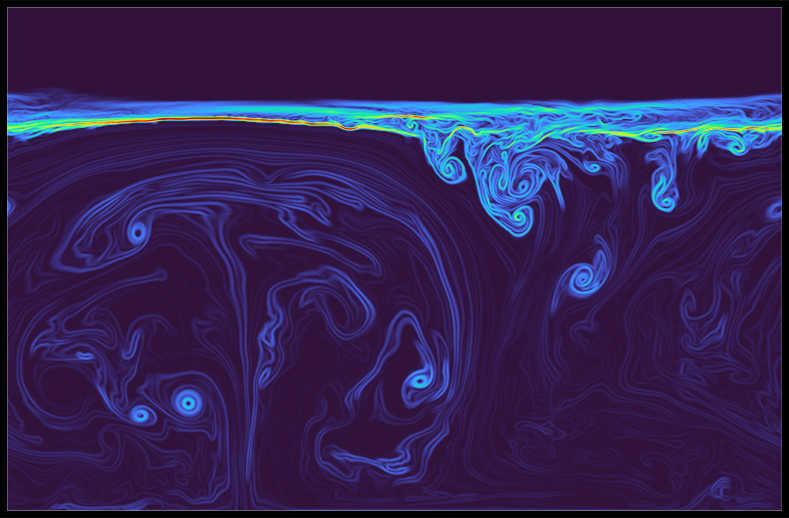

In [27]:
set_plot_style()

fig, ax = make_plot_for_real(
  epoch=3000, variable='0002',
  data_name='2D_1032_for_movie_from_time_zero',
  perturbation=False,
  colormap='turbo',
  percentile=100,
  stretch=0.60,
)    

In [28]:
def make_ui():
    play = widgets.Play(
        value=3000,
        min=1,
        max=7947,
        step=1,
        interval=200,
        description="Press play",
        disabled=False
    )
    
    epoch_slider = widgets.IntSlider(description='Epoch', min=1, max=7947, step=1,
                                     value=3000, continuous_update=False,
                                     layout=Layout(width='90%'))
    
    widgets.jslink((play, 'value'), (epoch_slider, 'value'))

    info = data_info('2D')
    variables = variable_names(info['dir'], info['file_name'], CUSTOM_VARIABLES)
        
    variable_dropdown = widgets.Dropdown(
        options=variables,
        value='0002',
        description='Variable',
        disabled=False,
    )
    
    data_name_dropdown = widgets.Dropdown(
        options=ALL_DATA.keys(),
        value='2D_1032_for_movie_from_time_zero',
        description='Right',
        disabled=False,
    )
    
    color_dropdown = widgets.Dropdown(
        options=all_colormaps(),
        value='turbo',
        description='Color',
        disabled=False,
    )
    
    percentile_slider = widgets.IntSlider(
        description='Percentile', min=1, max=100, step=1,
        value=100, continuous_update=False)
    
    stretch_slider = widgets.FloatSlider(
        description='Stretch', min=0.05, max=5, step=0.05,
        value=0.60, continuous_update=False)
    
    perturbation_checkbox = widgets.Checkbox(value=False, description='Perturbation')


    ui = widgets.VBox([
        widgets.HBox([play, epoch_slider]),
        widgets.HBox([variable_dropdown, data_name_dropdown, perturbation_checkbox]),
        widgets.HBox([color_dropdown, percentile_slider, stretch_slider])
    ])

    out = widgets.interactive_output(
        make_plot_for_real,
        {
            'epoch': epoch_slider,
            'variable': variable_dropdown,
            'data_name': data_name_dropdown,
            'perturbation': perturbation_checkbox,
            'colormap': color_dropdown,
            'percentile': percentile_slider,
            'stretch': stretch_slider
        }
    )

    display(ui, out)
    
make_ui()

Output()